###**Import Libraries**

In [1]:
#import libraries
from google.colab import drive
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn

###**Upload the file**

In [2]:
#allow access to Google Drive
drive.mount('/content/gdrive')

#uplaods the file
data = pd.read_csv('gdrive/My Drive/News/N24_news_complete.csv', delimiter=',')

#see 5 first rows
data.head(5)

Mounted at /content/gdrive


,section,abstract,article_url,body,caption,headline,image_id,image_url
0,Health,The tobacco and vaping industries and conserva...,https://www.nytimes.com/2019/12/31/health/e-ci...,The Trump administration is expected to announ...,A new study by the National Institute on Drug ...,F.D.A. Plans to Ban Most E-Cigarette Flavors b...,42d25485-0e48-50bf-8d16-948833b2a55d,https://static01.nyt.com/images/2019/11/06/sci...
1,Science,"All year long, Earth passes through streams of...",https://www.nytimes.com/2020/01/01/science/met...,All year long as Earth revolves around the sun...,"Perseid meteors named as ""Orinoid"" streak acro...",Meteor Showers in 2020 That Will Light Up Nigh...,04bc90f0-b20b-511c-b5bb-3ce13194163f,https://static01.nyt.com/images/2020/01/01/sci...
2,Science,A year full of highs and lows in space just en...,https://www.nytimes.com/2020/01/01/science/spa...,"If you follow space news and astronomy, the pa...",Spectators viewing the launch of a Soyuz rocke...,"Rocket Launches, Trips to Mars and More 2020 S...",bd8647b3-8ec6-50aa-95cf-2b81ed12d2dd,https://static01.nyt.com/images/2020/01/01/sci...
3,Television,"""Linda Ronstadt: The Sound of My Voice"" airs o...",https://www.nytimes.com/2020/01/01/arts/televi...,LINDA RONSTADT: THE SOUND OF MY VOICE (2019) 9...,"Linda Ronstadt in ""Linda Ronstadt: The Sound o...",What's on TV Wednesday: A Linda Ronstadt Doc a...,e6c25b53-0416-5795-b0cf-e1243924dc79,https://static01.nyt.com/images/2020/01/01/art...
4,Travel,Interested in the southernmost continent? Here...,https://www.nytimes.com/2020/01/01/travel/anta...,As the number of travelers cruising Antarctica...,"Antarctica21&rsquo;s expedition ship, Ocean No...",New Cruise Ships to Set Sail for Antarctica,98c3d182-95ce-5244-9b9e-008a3dee7354,https://static01.nyt.com/images/2020/01/05/tra...


###**Exploring the data**

section          0
abstract         0
article_url      0
body             0
caption        302
headline         0
image_id         0
image_url        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61198 entries, 0 to 61197
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   section      61198 non-null  object
 1   abstract     61198 non-null  object
 2   article_url  61198 non-null  object
 3   body         61198 non-null  object
 4   caption      60896 non-null  object
 5   headline     61198 non-null  object
 6   image_id     61198 non-null  object
 7   image_url    61198 non-null  object
dtypes: object(8)
memory usage: 3.7+ MB
None
       section                                        abstract  \
count    61198                                           61198   
unique      24                                           60079   
top      Books  Previews, openings and some last-chance picks.   
freq    

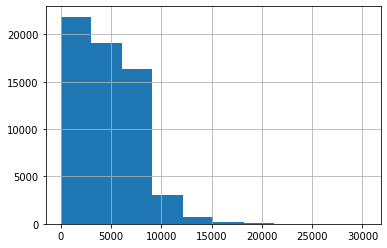

In [3]:
#shows null values
print(data.isnull().sum())

#shows data info
print(data.info())

#describes the data
print(data.describe())

#unique values
print(data.nunique())

#histogram
data['body'].str.len().hist()

###**Cleaning Data**

In [ ]:
#drops columns
data = data.drop(columns=['article_url', 'image_id', 'image_url'])

#creates a duplicate
new_data = data

#row body
new_data['raw_body'] = data['body']

#show first 5 rows
new_data.head()

###**Tokenization**

In [ ]:
#download package
nltk.download('punkt')

#remove blank rows
data['body'].dropna(inplace=True)

#change to lower case
data['body'] = [entry.lower() for entry in data['body']]

#word tokenization
data['body']= [word_tokenize(entry) for entry in data['body']]

#print 5 rows
new_data.head(5)

###**Lemmatization**

In [ ]:
#download packages
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(data['body']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data.loc[index,'text_final'] = str(Final_words)

#adds column to dataframe
new_data['final_text'] = data['text_final']

#print 5 rows
new_data.head(5)

###**Export File**

In [ ]:
#exports the clean file
new_data.to_csv('clean_data.csv')
!cp clean_data.csv "gdrive/My Drive/News/"